## Caluculate Dice

In [1]:
import numpy as np
import SimpleITK as sitk
import os

In [2]:
def DICE(turelabel, result):
    intersection=np.sum(np.minimum(np.equal(turelabel,result),turelabel))
    union = np.count_nonzero(turelabel)+np.count_nonzero(result)
    dice = 2 * intersection / union
   # print("intersection: ",2* intersection)
    #print("union: ", union)
    return dice

def averagenum(num):
    if len(num) == 0:
        return 1.0
    
    else: 
        nsum = 0
        for i in range(len(num)):
            nsum += num[i]

        return nsum / len(num)

In [3]:
whole_dice=[]
kidney_dice = []
cancer_dice = []
skipcount = 0
ignorePatient = ["005","151","165","194"]
testing =  ['006', '052', '075', '115', '065', '022', '061', '181', '012', '107', '028', '079', '031', '086', '044', '146', '027', '164', '003', '090', '150', '084', '183', '161', '005', '193', '154', '100', '036', '001']
testing = ['173', '002', '068', '133', '155', '114', '090', '105', '112', '175', '183', '208', '029', '065', '157', '162', '141', '062', '031', '156', '189', '135', '020', '077', '000', '009', '198', '036']
#testing =  ['044', '035', '083', '197', '176', '102', '175', '076', '125', '129', '004', '047', '057', '119', '208', '162', '126', '136', '171', '003', '088', '172', '071', '142', '069', '023', '014', '036']
#testing =  ['167', '095', '117', '082', '022', '174', '176', '012', '008', '178', '025', '171', '146', '019', '045', '048', '039', '001', '002', '133', '209', '060', '125', '155', '046', '143', '053', '020', '152', '102']
#testing = ['059', '096', '169', '075', '051', '175', '010', '157', '186', '108', '042', '166', '027', '017', '201', '133', '031', '076', '002', '032', '150', '060', '069', '155', '180', '143', '086', '151', '118', '013', '168']
for i, x in enumerate(testing):
    if x in ignorePatient:
        skipcount += 1
        continue
    count = -1
    image_kid =[]
    image_can = []
    result_kid = []
    result_can = []
    
    #image=sitk.ReadImage(os.path.join(r"E:\slice\layers_1\3D_Old\case_00"+str(x).zfill(3),"label.mha"))
    image=sitk.ReadImage(os.path.join(r"E:\kits19\data\case_00" + x,"segmentation.nii.gz"))
    #image=sitk.ReadImage(os.path.join(r"C:\Users\VMLAB\Desktop\2Dkidney\test\label.mha"))
    result=sitk.ReadImage(os.path.join(r"E:\slice\layers_1_hist_org_0.0\segmentation\case_00" + x,"label.mha"))
    #result=sitk.ReadImage(os.path.join(r"C:\Users\VMLAB\Desktop\2Dkidney\test\result.mha"))
    image_arry = sitk.GetArrayFromImage(image)
    result_arry = sitk.GetArrayFromImage(result)
    #print(np.sum(np.where(result_arry==2,True,False)))
    #print(image_arry.shape, result_arry.shape)


    whole_dice.append(DICE(image_arry,result_arry))

    image_kid = np.where(image_arry==1,1,0)
    image_can = np.where(image_arry==2,2,0)

    result_kid = np.where(result_arry==1,1,0)
    result_can = np.where(result_arry==2,2,0)

        
    kidney_dice.append(DICE(image_kid,result_kid))
    cancer_dice.append(DICE(image_can,result_can))
    

    print("case _00"+str(x).zfill(3)+"<br>")
    print("whole_dice: {}<br>".format(whole_dice[i-skipcount]))
    print("kidney dice: {}<br>".format(kidney_dice[i-skipcount]))
    print("cancer dice: {}<br>".format(cancer_dice[i-skipcount]))
    print("")
    
print("average whole: {}<br>".format(averagenum(whole_dice)))
print("average kidney: {}<br>".format(averagenum(kidney_dice)))
print("average cancer: {}<br>".format(averagenum(cancer_dice)))

RuntimeError: Exception thrown in SimpleITK ReadImage: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:99:
sitk::ERROR: The file "E:/kits19/data/case_00173/segmentation.nii.gz" does not exist.

In [3]:
whole_dice=[]
kidney_dice = []
cancer_dice = []
skipcount = 0
ignorePatient = ["005","151","165","194"]
testing =  ['006', '052', '075', '115', '065', '022', '061', '181', '012', '107', '028', '079', '031', '086', '044', '146', '027', '164', '003', '090', '150', '084', '183', '161', '005', '193', '154', '100', '036', '001']
testing = ['173', '002', '068', '133', '155', '114', '090', '105', '112', '175', '183', '208', '029', '065', '157', '162', '141', '062', '031', '156', '189', '135', '020', '077', '000', '009', '198', '036']
alpha = ["0.50","0.55","0.60","0.65","0.70"]
for a in alpha:
    for i, x in enumerate(testing):
        if x in ignorePatient:
            skipcount += 1
            continue
        count = -1
        image_kid =[]
        image_can = []
        result_kid = []
        result_can = []

        #image=sitk.ReadImage(os.path.join(r"E:\slice\layers_1\3D_Old\case_00"+str(x).zfill(3),"label.mha"))
        image=sitk.ReadImage(os.path.join(r"E:\kits19\data\case_00" + x,"segmentation.nii.gz"))
        #image=sitk.ReadImage(os.path.join(r"C:\Users\VMLAB\Desktop\2Dkidney\test\label.mha"))
        result=sitk.ReadImage(os.path.join(r"E:\slice\layers_1_hist_org_" + a ,"segmentation/case_00" + x,"label.mha"))
        #result=sitk.ReadImage(os.path.join(r"C:\Users\VMLAB\Desktop\2Dkidney\test\result.mha"))
        image_arry = sitk.GetArrayFromImage(image)
        result_arry = sitk.GetArrayFromImage(result)
        #print(np.sum(np.where(result_arry==2,True,False)))
        #print(image_arry.shape, result_arry.shape)


        whole_dice.append(DICE(image_arry,result_arry))

        image_kid = np.where(image_arry==1,1,0)
        image_can = np.where(image_arry==2,2,0)

        result_kid = np.where(result_arry==1,1,0)
        result_can = np.where(result_arry==2,2,0)


        kidney_dice.append(DICE(image_kid,result_kid))
        cancer_dice.append(DICE(image_can,result_can))

    print("Alpha: {}<br>".format(a))
    print("Average whole: {}<br>".format(averagenum(whole_dice)))
    print("Average kidney: {}<br>".format(averagenum(kidney_dice)))
    print("Average cancer: {}<br>".format(averagenum(cancer_dice)))

Alpha: 0.50<br>
Average whole: 0.9448515621499594<br>
Average kidney: 0.9530085024984788<br>
Average cancer: 0.6121364117468414<br>


RuntimeError: Exception thrown in SimpleITK ReadImage: C:\Users\dashboard\Miniconda3\conda-bld\simpleitk_1546533074085\work\Code\IO\src\sitkImageReaderBase.cxx:99:
sitk::ERROR: The file "E:\slice\layers_1_hist_org_0.55\segmentation/case_00173\label.mha" does not exist.

## Caluculate cancer size

In [24]:
def caluculate_size(imgArray, target):
    imgArray = np.where(imgArray==target, target, 0)
    size = np.count_nonzero(imgArray)
    
    return size

## Read scores

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def read_score(textfile):
    with open(textfile) as f:
        dice = {}
        scores = []
        lines = f.readlines()
        
        for line in lines:
            x = line.replace("\n", "").replace("<br>","").split(":")
            if len(x)==1:
                continue

            scores.append(x)

        for score in scores:
            #print(score)
            if score[0] not in dice:
                dice[score[0]] = []

            dice[score[0]].append(float(score[1]))
        
            
        return dice

Hist Max Min


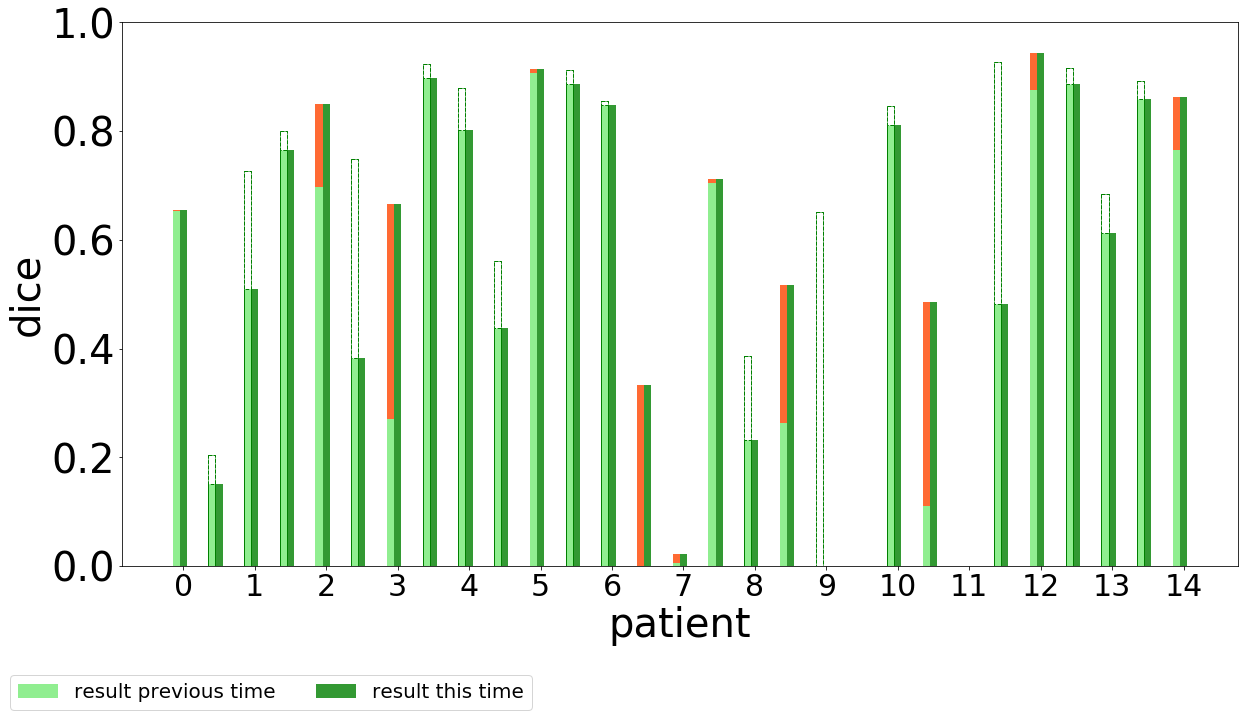

In [35]:
xx = read_score(r"./result/histMaxMin.txt")
yy = read_score(r"./result/hist.txt")

zz = np.array(xx["cancer dice"]) - np.array(yy["cancer dice"])
plus = [[], [], []]
minus = [[], [], []]
for i, z in enumerate(zz):
    if z>=0:
        plus[0].append(i)
        plus[1].append(z)
        plus[2].append(yy["cancer dice"][i])
    else:
        minus[0].append(i)
        minus[1].append(z)
        minus[2].append(yy["cancer dice"][i])
        
print("Hist Max Min")
lefts = np.array(list(range(0, len(xx["kidney dice"]), 2)))
left = np.arange(len(xx["cancer dice"]))
axis = np.arange(10)
y = [0.0,0.2,0.4,0.6,0.8,1.0]

width = 0.2
plt.figure(figsize=(20,10))
#plt.bar(left, yy["cancer dice"], color="darkgreen",width=width, align="center",label="dice_ocs")
plt.bar(plus[0], plus[2], color="lightgreen",width=width, align="center",label="result previous time")
plt.bar(plus[0],plus[1],width=width, color="orangered", align="center",bottom=plus[2],alpha=0.8)

plt.bar(minus[0],minus[2],width=width, color="lightgreen", align="center",edgecolor="green")
plt.bar(minus[0],minus[1],width=width, color="white", align="center",bottom=minus[2], edgecolor="green", linestyle="--")

#plt.bar(left+width,yy["cancer dice"],width=width, color="seagreen", align="center",label="dice_ocs_I")
plt.bar(left+width,xx["cancer dice"],width=width, color="green", align="center",label="result this time", alpha=0.8)
#plt.bar(left+width+width+width,dice_all_I["cancer dice"],width=width, color="black", align="center",label="dice_all_I")

plt.legend(bbox_to_anchor=(-0.1,-0.2),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(lefts+width,left)
#plt.xticks(left,left)
plt.yticks(y)
plt.xlabel("patient",fontsize=40)
plt.ylabel("dice",fontsize=40)
plt.tick_params(axis="both",labelsize=30.0)
plt.tick_params(axis="x",labelsize=30.0)
plt.tick_params(axis="y",labelsize=40.0)

hist


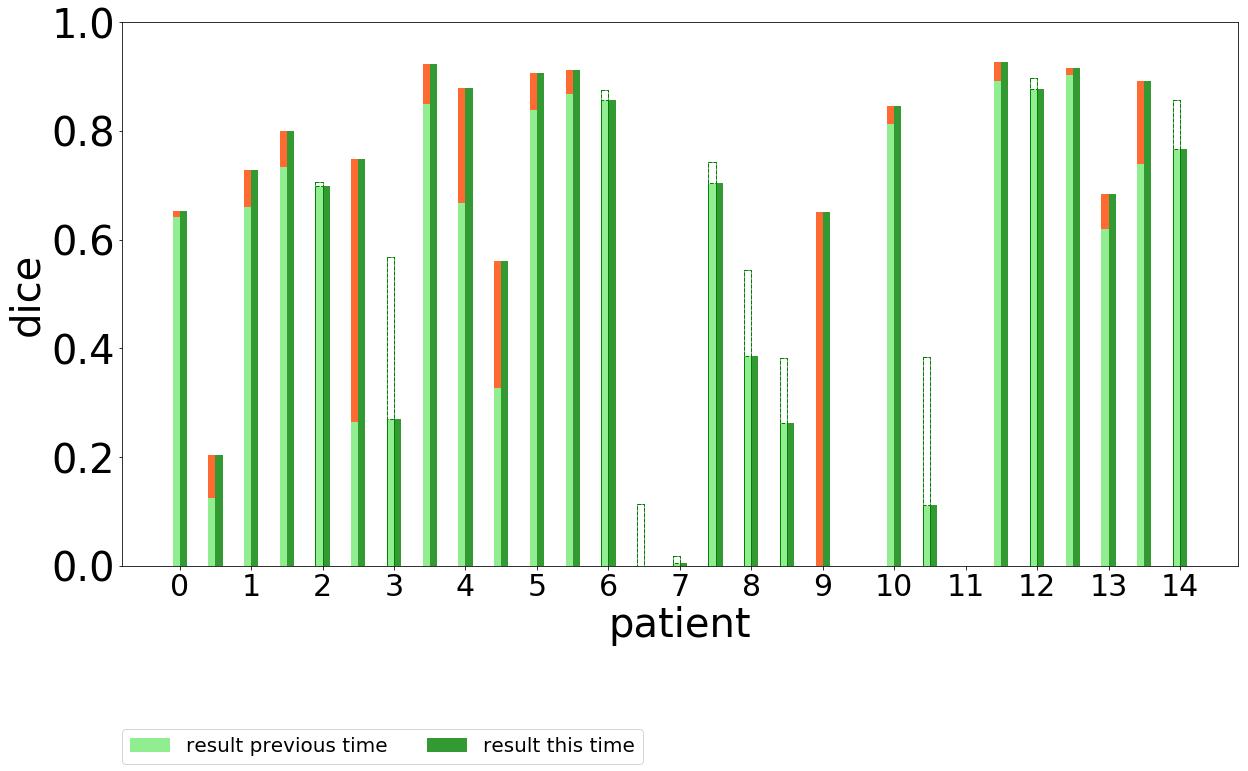

In [41]:
xx = read_score(r"./result/hist.txt")
yy = read_score(r"./result/logDice.txt")

zz = np.array(xx["cancer dice"]) - np.array(yy["cancer dice"])
plus = [[], [], []]
minus = [[], [], []]
for i, z in enumerate(zz):
    if z>=0:
        plus[0].append(i)
        plus[1].append(z)
        plus[2].append(yy["cancer dice"][i])
    else:
        minus[0].append(i)
        minus[1].append(z)
        minus[2].append(yy["cancer dice"][i])
        
print("hist")
left = np.arange(len(xx["kidney dice"]))
axis = np.arange(10)
y = [0.0,0.2,0.4,0.6,0.8,1.0]
lefts = np.array(list(range(0, len(xx["kidney dice"]), 2)))

width = 0.2
plt.figure(figsize=(20,10))
#plt.bar(left, yy["cancer dice"], color="darkgreen",width=width, align="center",label="dice_ocs")
plt.bar(plus[0], plus[2], color="lightgreen",width=width, align="center",label="result previous time")
plt.bar(plus[0],plus[1],width=width, color="orangered", align="center",bottom=plus[2],alpha=0.8)

plt.bar(minus[0],minus[2],width=width, color="lightgreen", align="center",edgecolor="green")
plt.bar(minus[0],minus[1],width=width, color="white", align="center",bottom=minus[2], edgecolor="green", linestyle="--")

#plt.bar(left+width,yy["cancer dice"],width=width, color="seagreen", align="center",label="dice_ocs_I")
plt.bar(left+width,xx["cancer dice"],width=width, color="green", align="center",label="result this time", alpha=0.8)
#plt.bar(left+width+width+width,dice_all_I["cancer dice"],width=width, color="black", align="center",label="dice_all_I")

plt.legend(bbox_to_anchor=(-0/1,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(lefts + width/2,left)
#plt.xticks(left,left)
plt.yticks(y)
plt.xlabel("patient",fontsize=40)
plt.ylabel("dice",fontsize=40)
plt.tick_params(axis="both",labelsize=30.0)
plt.tick_params(axis="x",labelsize=30.0)
plt.tick_params(axis="y",labelsize=40.0)

log dice


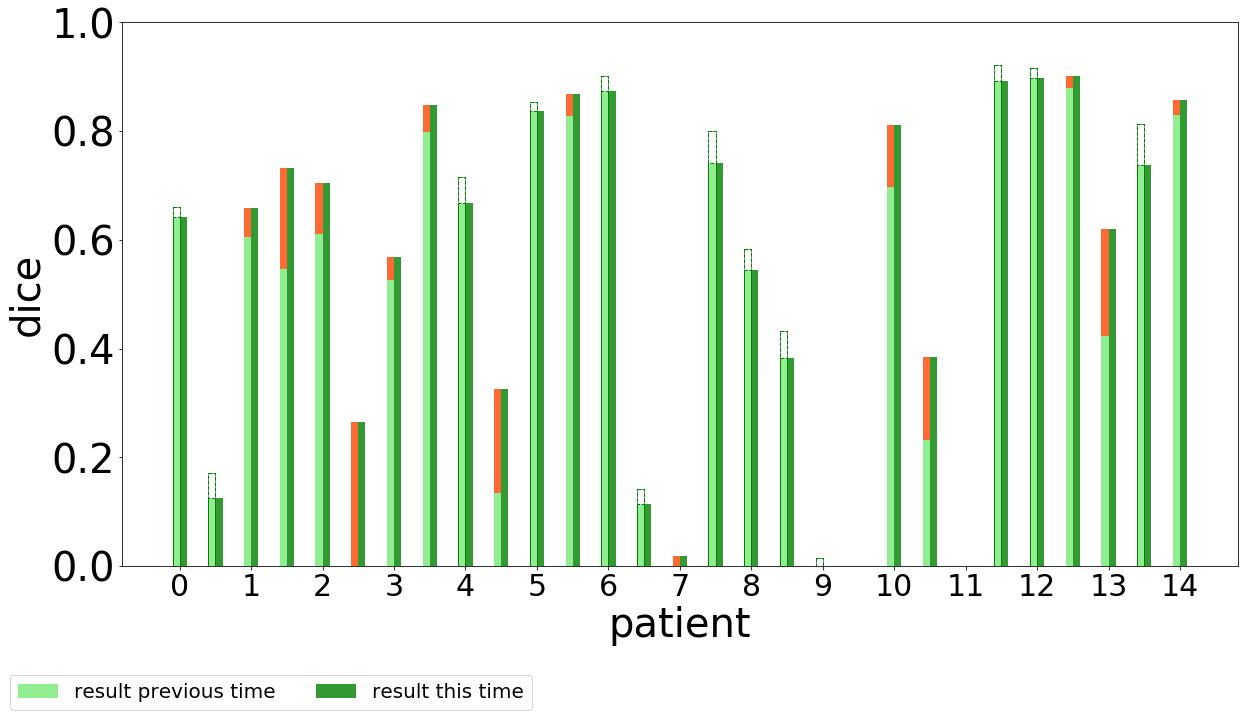

In [40]:
xx = read_score(r"./result/logDice.txt")
yy = read_score(r"./result/augumentation.txt")

zz = np.array(xx["cancer dice"]) - np.array(yy["cancer dice"])
plus = [[], [], []]
minus = [[], [], []]
for i, z in enumerate(zz):
    if z>=0:
        plus[0].append(i)
        plus[1].append(z)
        plus[2].append(yy["cancer dice"][i])
    else:
        minus[0].append(i)
        minus[1].append(z)
        minus[2].append(yy["cancer dice"][i])

print("log dice")
left = np.arange(len(xx["kidney dice"]))
axis = np.arange(10)
y = [0.0,0.2,0.4,0.6,0.8,1.0]
lefts = np.array(list(range(0, len(xx["kidney dice"]), 2)))

width = 0.2
plt.figure(figsize=(20,10))
#plt.bar(left, yy["cancer dice"], color="darkgreen",width=width, align="center",label="dice_ocs")
plt.bar(plus[0], plus[2], color="lightgreen",width=width, align="center",label="result previous time")
plt.bar(plus[0],plus[1],width=width, color="orangered", align="center",bottom=plus[2],alpha=0.8)

plt.bar(minus[0],minus[2],width=width, color="lightgreen", align="center",edgecolor="green")
plt.bar(minus[0],minus[1],width=width, color="white", align="center",bottom=minus[2], edgecolor="green", linestyle="--")

#plt.bar(left+width,yy["cancer dice"],width=width, color="seagreen", align="center",label="dice_ocs_I")
plt.bar(left+width,xx["cancer dice"],width=width, color="green", align="center",label="result this time", alpha=0.8)
#plt.bar(left+width+width+width,dice_all_I["cancer dice"],width=width, color="black", align="center",label="dice_all_I")

plt.legend(bbox_to_anchor=(-0.1,-0.2),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(lefts + width/2,left)
#plt.xticks(left,left)
plt.yticks(y)
plt.xlabel("patient",fontsize=40)
plt.ylabel("dice",fontsize=40)
plt.tick_params(axis="both",labelsize=30.0)
plt.tick_params(axis="x",labelsize=30.0)
plt.tick_params(axis="y",labelsize=40.0)

## Plot

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
kid_org = [0.9798707216156402, 0.9702896334404324, 0.9484599673364412, 0.977027209148284, 0.9596520804599016, 0.9692279876629982, 0.9792234028140145, 0.8611743616236672, 0.9717547713732027, 0.9521487002654427, 0.9321759301989306, 0.8733112864152334, 0.9492609449398011, 0.9743700269777218, 0.7784191536442375, 0.9449145560216876, 0.9701411540618653, 0.962812537881679, 0.9808173225435477, 0.9703694623314754, 0.9500971156005972, 0.9698830851184584, 0.9695343536190858, 0.9174371019203154, 0.9059062520046912, 0.9187421383647799, 0.9807073804305889, 0.8936142520775077, 0.9037488524383784]
can_org = [0.5615968003622231, 0.13263879177737378, 0.6718006473279964, 0.587745565829741, 0.30804845811532655, 0.2081370701837023, 0.7220768592994584, 0.7900155006123699, 0.5800977114939573, 0.0011686426780766403, 0.43065253269011045, 0.7323767736820503, 0.7008395032938844, 0.07648279766023021, 0.0008351161763609354, 0.35398026693809204, 0.405794701986755, 0.05119158797689461, 0.0, 0.0, 0.5764705304373885, 0.39150151158884783, 0.0, 0.7403161804686984, 0.8770950030134363, 0.6740114164029458, 0.4258720930232558, 0.6485625473018951, 0.6654026634427833]

## Original result

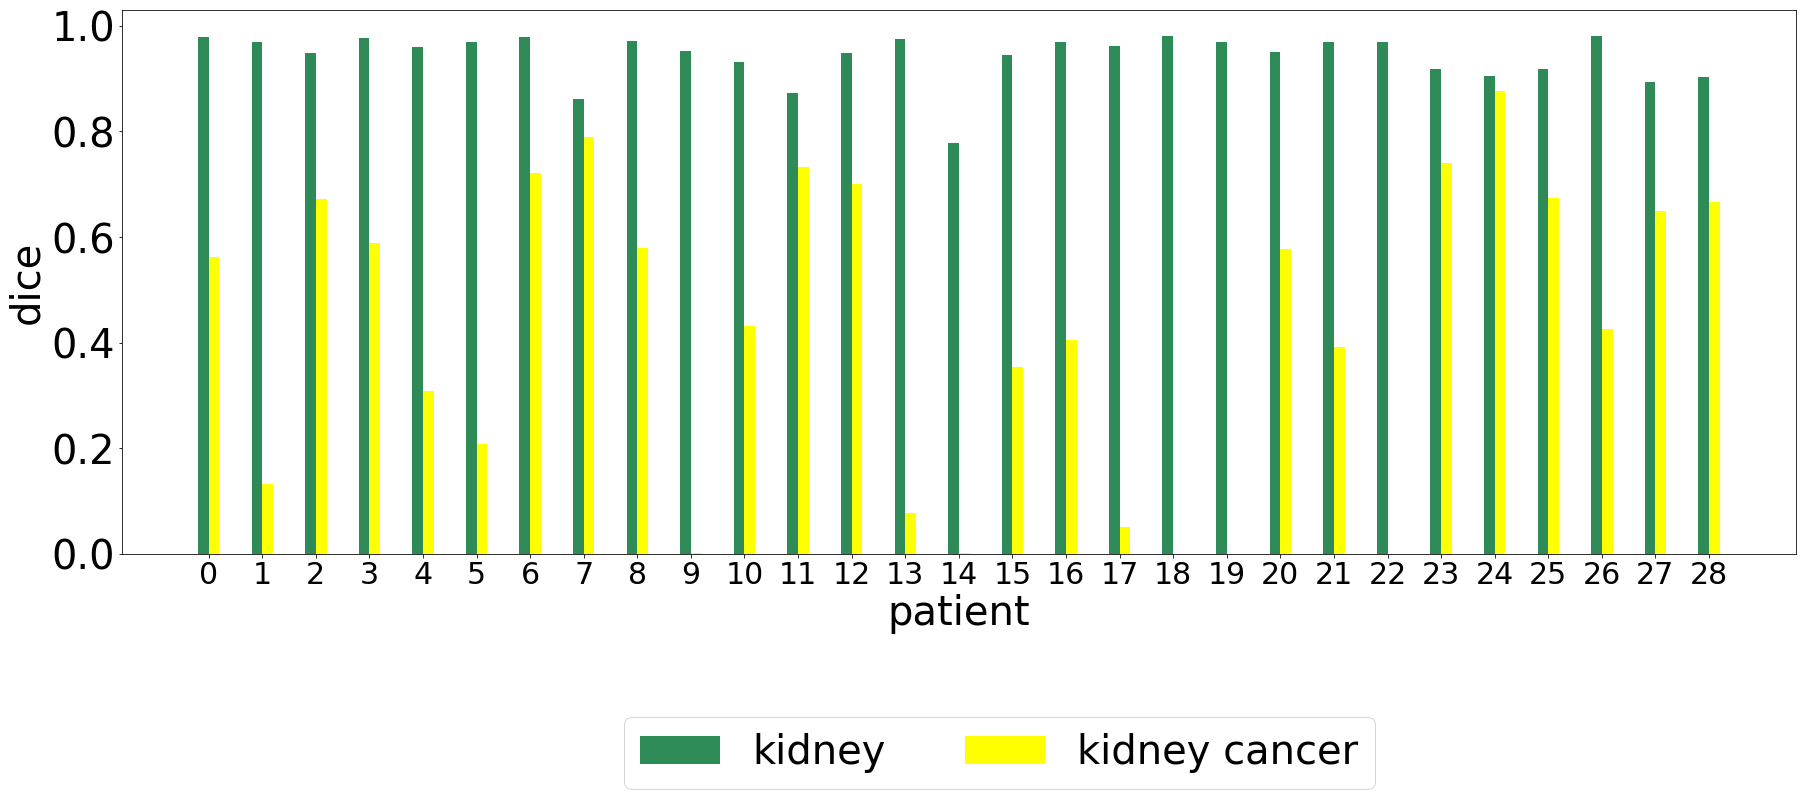

In [39]:
left = np.arange(len(kid_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.2
plt.figure(figsize=(30,10))
#plt.bar(left, whole_org, color="r",width=width, align="center",label="whole")
plt.bar(left,kid_org,width=width, color="seagreen", align="center",label="kidney")
plt.bar(left+width,can_org,width=width, color="yellow", align="center",label="kidney cancer")
plt.legend(bbox_to_anchor=(0.3, -0.3),loc='upper left',ncol=2,borderaxespad=0,fontsize=40)
plt.xticks(left + width/2,left)
plt.xlabel("patient",fontsize=40)
plt.ylabel("dice",fontsize=40)
plt.tick_params(axis="x",labelsize=30.0)
plt.tick_params(axis="y",labelsize=40.0)

## Result with weight decay

In [3]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.2
plt.bar(left, whole_weight, color="r",width=width, align="center",label="whole")
plt.bar(left+width,kid_weight,width=width, color="seagreen", align="center",label="kidney")
plt.bar(left+width+width,can_weight,width=width, color="yellow", align="center",label="kidney cancer")
plt.legend(bbox_to_anchor=(-0.3,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

NameError: name 'whole_org' is not defined

## Marge result

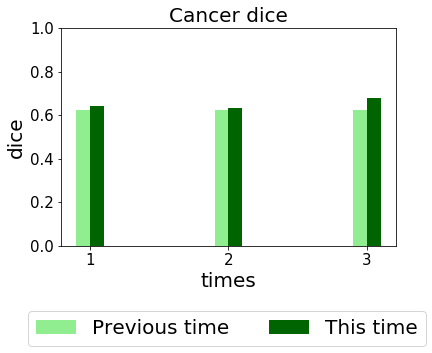

In [17]:
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
y = [0.0,0.2,0.4,0.6,0.8,1.0]
average whole: 0.9276705473699906
average kidney: 0.9407447599910144
average cancer: 0.6049036074904571

average whole: 0.9417800016917899
average kidney: 0.9492651099425313
average cancer: 0.6248215703428023

width = 0.1
pre = [0.6248215703428023,0.6248215703428023,0.6248215703428023]
dice = [ 0.6420426828399245, 0.6319294990301175, 0.6801693253999594]
left = np.arange(len(dice))+1

plt.bar(left, pre, color="lightgreen",width=width, align="center",label="Previous time")
plt.bar(left+width,dice,width=width,color="darkgreen", align="center",label="This time")
#plt.bar(left+width+width,can_weight,width=width,color="yellow", align="center",label="kidney cancer")

plt.legend(bbox_to_anchor=(-0.1,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.title("Cancer dice", fontsize=20)
plt.xticks(left + width/2,left)
plt.yticks(y)
plt.xlabel("times",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Compare orginal result with result with weight decay

## Kidney

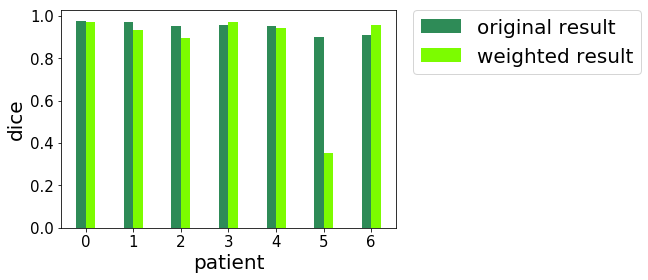

In [12]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.2
#plt.bar(left, whole_org, color="r",width=width, align="center",label="original result")
plt.bar(left,kid_org,width=width,color="seagreen", align="center",label="original result")
#plt.bar(left,can_org,width=width,color="r", align="center",label="original result")

#plt.bar(left+width, whole_weight, color="b",width=width, align="center",label="weighted result")
plt.bar(left+width,kid_weight,width=width,color="lawngreen", align="center",label="weighted result")
#plt.bar(left+width,can_weight,width=width,color='b', align="center",label="weighted result")

plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left',borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
#plt.yticks(y)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Kidney cancer

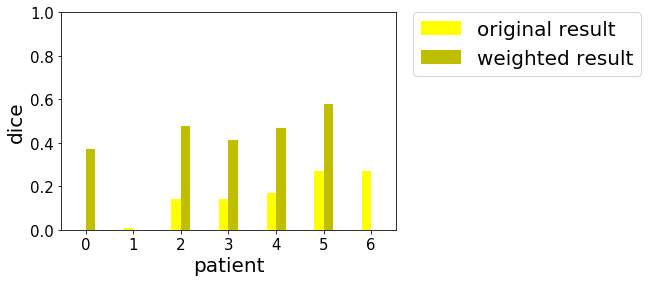

In [13]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
y = [0.0,0.2,0.4,0.6,0.8,1.0]
width = 0.2
#plt.bar(left, whole_org, color="r",width=width, align="center",label="original result")
#plt.bar(left,kid_org,width=width,color="r", align="center",label="original result")
plt.bar(left,can_org,width=width,color="yellow", align="center",label="original result")

#plt.bar(left+width, whole_weight, color="b",width=width, align="center",label="weighted result")
#plt.bar(left+width,kid_weight,width=width,color="b", align="center",label="weighted result")
plt.bar(left+width,can_weight,width=width,color='y', align="center",label="weighted result")

plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left',borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
plt.yticks(y)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

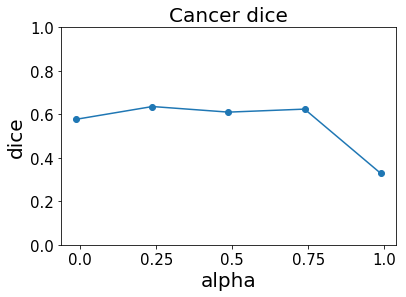

In [29]:
dice = [0.5773082946718281, 0.6359103176217766, 0.6101408753448856, 0.6239896914982452, 0.3287852419021097]
alpha = [0.0, 0.25, 0.50, 0.75, 1.0]
y = [0.0,0.2,0.4,0.6,0.8,1.0]
left = np.arange(len(dice))+1
plt.plot(left, dice, marker="o")

#plt.legend(bbox_to_anchor=(-0.1,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.title("Cancer dice", fontsize=20)
plt.xticks(left + width/2,alpha)
plt.yticks(y)
plt.xlabel("alpha",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Extract CT, label, segmentation data

In [12]:
import os
import shutil

In [14]:
testing =  ['006', '052', '075', '115', '065', '022', '061', '181', '012', '107', '028', '079', '031', '086', '044', '146', '027', '164', '003', '090', '150', '084', '183', '161', '005', '193', '154', '100', '036', '001']
ignorePatient = ["005","151","165","194"]

In [17]:
for x in testing:
    if x in ignorePatient:
        continue
    
    ctPath = labelPath = os.path.join("E:\kits19\data\case_00" + x, "imaging.nii.gz")
    labelPath = os.path.join("E:\kits19\data\case_00" + x, "segmentation.nii.gz")
    segmetationPath = os.path.join("E:\slice\layers_1_hist_org_0.25\segmentation\case_00" + x, "label.mha")
    
    savePath = "E:/showCT/case_00" + x
    if not os.path.exists(savePath):
        print("Make ", savePath)
        os.makedirs(savePath, exist_ok = True)
        
    shutil.copy(ctPath, savePath)
    shutil.copy(labelPath, savePath)
    shutil.copy(segmetationPath, savePath)

Make  E:/showCT/case_00006
Make  E:/showCT/case_00052
Make  E:/showCT/case_00075
Make  E:/showCT/case_00115
Make  E:/showCT/case_00065
Make  E:/showCT/case_00022
Make  E:/showCT/case_00061
Make  E:/showCT/case_00181
Make  E:/showCT/case_00012
Make  E:/showCT/case_00107
Make  E:/showCT/case_00028
Make  E:/showCT/case_00079
Make  E:/showCT/case_00031
Make  E:/showCT/case_00086
Make  E:/showCT/case_00044
Make  E:/showCT/case_00146
Make  E:/showCT/case_00027
Make  E:/showCT/case_00164
Make  E:/showCT/case_00003
Make  E:/showCT/case_00090
Make  E:/showCT/case_00150
Make  E:/showCT/case_00084
Make  E:/showCT/case_00183
Make  E:/showCT/case_00161
Make  E:/showCT/case_00193
Make  E:/showCT/case_00154
Make  E:/showCT/case_00100
Make  E:/showCT/case_00036
Make  E:/showCT/case_00001


## Random dataset by pandas

validation =  ['134', '046', '021', '038', '044', '070', '179', '006', '204', '152', '190', '084', '118', '047', '200', '101', '148', '050', '110', '032', '078', '025', '016', '142', '168', '111', '182', '041']<br>
training =  ['207', '080', '095', '099', '007', '028', '053', '137', '176', '106', '083', '127', '094', '103', '193', '019', '197', '037', '196', '035', '113', '146', '185', '093', '145', '102', '056', '042', '139', '067', '180', '061', '026', '174', '153', '001', '064', '075', '091', '129', '147', '058', '178', '085', '086', '203', '003', '138', '144', '051', '122', '024', '076', '205', '121', '063', '108', '027', '188', '184', '004', '160', '119', '164', '045', '130', '072', '049', '166', '154', '209', '143', '013', '163', '074', '081', '048', '052', '126', '087', '149', '117', '136', '012', '206', '040', '191', '054', '124', '066', '195', '187', '132', '057', '150', '060', '089', '104', '170', '159', '171', '169', '039', '125', '199', '011', '008', '073', '055', '107', '079', '092', '192', '030', '186', '181', '088', '172', '034', '018', '120', '082', '177', '014', '158', '109', '100', '131', '033', '010', '140', '069', '022', '123', '071', '023', '098', '116', '128', '043', '059', '161', '115', '097', '167', '017', '015', '201', '096', '202']<br>
testing =  ['173', '002', '068', '133', '155', '114', '090', '105', '112', '175', '183', '208', '029', '065', '157', '162', '141', '062', '031', '156', '189', '135', '020', '077', '000', '009', '198', '036']

## Random dataset by Chow

validation =  ['160', '095', '117', '163', '018', '198', '066', '067', '202', '078', '056', '116', '072', '064', '007', '133', '039', '121', '076', '136', '023', '060', '058', '182', '021', '188', '151', '158', '170', '197']<br>
training =  ['118', '000', '071', '087', '132', '059', '016', '159', '041', '122', '147', '204', '142', '203', '131', '140', '082', '169', '177', '096', '097', '014', '128', '167', '010', '174', '009', '148', '153', '011', '111', '034', '176', '168', '123', '062', '004', '175', '051', '138', '083', '186', '149', '199', '192', '030', '178', '108', '008', '092', '102', '189', '172', '109', '179', '055', '073', '047', '157', '139', '070', '135', '171', '113', '042', '024', '025', '029', '166', '088', '114', '099', '144', '013', '185', '040', '201', '162', '104', '077', '091', '173', '068', '017', '043', '101', '094', '105', '106', '207', '032', '053', '085', '048', '089', '130', '038', '103', '050', '187', '124', '045', '019', '126', '129', '033', '080', '002', '110', '035', '127', '196', '054', '120', '020', '063', '098', '209', '191', '081', '049', '057', '152', '119', '200', '156', '125', '015', '145', '137', '069', '190', '093', '134', '074', '141', '195', '112', '155', '026', '180', '194', '184', '037', '208', '205', '046', '165', '143', '206']<br>
testing =  ['006', '052', '075', '115', '065', '022', '061', '181', '012', '107', '028', '079', '031', '086', '044', '146', '027', '164', '003', '090', '150', '084', '183', '161', '005', '193', '154', '100', '036', '001']<br>

## Random dataset by pandas second times

validation =  ['163', '096', '016', '006', '168', '065', '198', '179', '186', '073', '166', '028', '032', '207', '038', '035', '027', '130', '085', '103', '023', '084', '026', '058', '005', '208', '151', '105', '047', '190']<br>
training =  ['000', '100', '142', '052', '204', '140', '118', '131', '115', '075', '097', '071', '160', '177', '128', '132', '169', '203', '122', '087', '059', '159', '014', '147', '041', '011', '036', '138', '175', '004', '018', '009', '051', '061', '153', '010', '123', '062', '111', '066', '148', '083', '034', '078', '107', '199', '181', '109', '092', '108', '067', '030', '189', '157', '139', '197', '202', '149', '172', '192', '055', '135', '088', '116', '024', '113', '056', '042', '029', '079', '114', '070', '013', '076', '106', '017', '110', '162', '077', '003', '170', '129', '187', '072', '126', '086', '158', '101', '127', '099', '040', '144', '121', '064', '031', '080', '173', '094', '136', '050', '044', '089', '033', '068', '185', '091', '164', '104', '201', '124', '043', '090', '196', '007', '057', '191', '098', '120', '150', '081', '054', '049', '063', '134', '093', '112', '137', '119', '141', '145', '074', '183', '156', '200', '195', '069', '161', '182', '015', '180', '205', '165', '184', '154', '188', '206', '037', '194', '021', '193']<br>
testing =  ['167', '095', '117', '082', '022', '174', '176', '012', '008', '178', '025', '171', '146', '019', '045', '048', '039', '001', '002', '133', '209', '060', '125', '155', '046', '143', '053', '020', '152', '102']<br>

## Random dataset by pandas third times

validation =  ['142', '147', '100', '041', '174', '009', '022', '179', '008', '102', '113', '070', '089', '050', '126', '101', '068', '064', '136', '080', '063', '195', '084', '125', '037', '165', '187', '049', '098']<br>
training =  ['203', '159', '117', '000', '160', '132', '014', '122', '204', '087', '071', '177', '095', '115', '082', '128', '052', '006', '131', '163', '167', '140', '016', '097', '061', '065', '123', '011', '004', '111', '062', '148', '034', '083', '176', '018', '153', '066', '138', '198', '036', '030', '149', '139', '178', '073', '192', '181', '067', '197', '012', '107', '047', '078', '109', '172', '055', '202', '189', '092', '199', '114', '079', '025', '116', '024', '135', '028', '088', '029', '056', '171', '144', '001', '104', '048', '044', '121', '045', '103', '085', '019', '207', '007', '035', '077', '130', '129', '164', '196', '043', '173', '106', '105', '033', '053', '124', '038', '094', '072', '146', '158', '185', '039', '003', '170', '090', '091', '099', '162', '127', '040', '110', '054', '209', '120', '191', '023', '020', '057', '081', '190', '015', '145', '156', '026', '074', '137', '152', '119', '200', '112', '141', '058', '183', '182', '093', '161', '134', '206', '021', '046', '193', '208', '188', '005', '205', '184', '194', '154']<br>
testing =  ['059', '096', '169', '075', '051', '175', '010', '157', '186', '108', '042', '166', '027', '017', '201', '133', '031', '076', '002', '032', '150', '060', '069', '155', '180', '143', '086', '151', '118', '013', '168']<br>

In [2]:
testing = ['173', '002', '068', '133', '155', '114', '090', '105', '112', '175', '183', '208', '029', '065', '157', '162', '141', '062', '031', '156', '189', '135', '020', '077', '000', '009', '198', '036']

In [3]:
a = ""
for x in testing:
    a += x
    a += " "
print(a)

173 002 068 133 155 114 090 105 112 175 183 208 029 065 157 162 141 062 031 156 189 135 020 077 000 009 198 036 


In [24]:
testing = ['006', '052', '075', '115', '065', '022', '061', '181', '012', '107', '028', '079', '031', '086', '044', '146', '027', '164', '003', '090', '150', '084', '183', '161', '005', '193', '154', '100', '036', '001']

In [25]:
sorted(testing)

['001',
 '003',
 '005',
 '006',
 '012',
 '022',
 '027',
 '028',
 '031',
 '036',
 '044',
 '052',
 '061',
 '065',
 '075',
 '079',
 '084',
 '086',
 '090',
 '100',
 '107',
 '115',
 '146',
 '150',
 '154',
 '161',
 '164',
 '181',
 '183',
 '193']